# EDA Project

# Project Proposal

<p>The source of my data is from NOAA, specifically the International Best Track Archive for Climate Stewardship 
<a href='https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r00/access/csv/' target='_blank'>(IBTrACS)</a>.  The site also offers storms after 1980 which I may do if the earlier years do not provide enough information.</p>
<p>I came across this data set while searching for hurricane information in
<a href='https://console.cloud.google.com/marketplace/product/noaa-public/hurricanes?project=earnest-airline-307913&folder=&organizationId=' target='_blank'>Big Query</a>.
This data set covers hurricanes and their intensities with positions across the Pacific, Atlantic and Indian Ocean regions.</p>

<p>I chose this data because I read an article a few months back about global warming and how the effects of 
global warming are increasing the intensities of hurricanes, not necessarily the frequency of them.  I have had a 
fascination with storms and started to wonder if hurricane frequency was increasing or not.</p>
<p>NOAA was my first choice for data, although some of the data I initially found was too granular.  There was too
much directional movement over smaller periods.  My husband suggested Big Query public data sets and it was there
that I found the IBTrACS data that included more of my interests such as wind intensities, regions and categories.</p>

<p>My goal for this project is to look at the number of tropical storms each year as well as their intensities
and calculate the average intensities based on the number of storms to see if storm intensities have grown over 
the last few decades.  I will factor in wind speeds, pressure, location and storm categories.</p>

In [580]:
import pandas as pd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

hurricanes_raw = pd.read_csv('hurricanes_full.csv', header=0, skiprows=[1], sep=',',\
                             na_values=[' '], low_memory=False)

In [581]:
hurricanes_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698308 entries, 0 to 698307
Columns: 163 entries, SID to STORM_DIR
dtypes: float64(142), int64(3), object(18)
memory usage: 868.4+ MB


In [582]:
hurricanes_raw.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,BOM_GUST_PER,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR
0,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 03:00:00,NR,10.9000,80.3000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,266.0
1,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 06:00:00,NR,10.8709,79.8265,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,267.0
2,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 09:00:00,NR,10.8431,79.3524,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,267.0
3,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 12:00:00,NR,10.8188,78.8772,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,267.0
4,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 15:00:00,NR,10.8000,78.4000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,268.0


In [583]:
hurricanes_raw.tail(5)

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,BOM_GUST_PER,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR
698303,2021193N10259,2021,38,EP,MM,FELICIA,2021-07-14 12:00:00,TS,14.1571,-113.457,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,285.0
698304,2021193N10259,2021,38,EP,MM,FELICIA,2021-07-14 15:00:00,TS,14.3636,-114.114,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,289.0
698305,2021193N10259,2021,38,EP,MM,FELICIA,2021-07-14 18:00:00,TS,14.6000,-114.800,...,NaN,NaN,NaN,12.0,30.0,NaN,NaN,NaN,14.0,288.0
698306,2021193N10259,2021,38,EP,MM,FELICIA,2021-07-14 21:00:00,TS,14.8104,-115.497,...,NaN,NaN,NaN,12.0,45.0,NaN,NaN,NaN,14.0,286.0
698307,2021193N10259,2021,38,EP,MM,FELICIA,2021-07-15 00:00:00,TS,15.0000,-116.200,...,NaN,NaN,NaN,12.0,60.0,NaN,NaN,NaN,14.0,286.0


# EDA Phase 1

<p>I hope to learn more about the behaviors of hurricanes each season, including most common locations, 
storm intensities, categorizations of storms and whether or not those things have changed over the years or if
the number of storms has remained consistent.</p>
<p>After reading an article about how global warming seems to affect the intensities of storm (not frequencies)
I am inclined to think that the storm wind speeds will have a higher average than a few decades ago.  I also expect
to see an increase in the number of storms due to the presence of more storm tracking instruments now.</p>
<p>Most of my life I have had interest in storms because of its strong nature and destructive effects to our society.  I had experienced high winds of a storm that passed near my childhood home.  Over the years I have observed and learned about stronger storms and because global warming has affected the globe in different ways, it is only natural that something like storms would be affected as well.  I would like to test my theory and confirm whether or not factors like global warming are increasing storm intensities.</p>

<p>The population of my data includes the year of each storm, its wind intensity, location, name, distance to land,
nature of the storm, storm speed and direction and its count in storms for the year.</p>
<p>The total sample size is 93,898 records.</p>

<p>Because the data set I retrieved was very large (163 columns) it included <i>many</i> null values which 
would not provide a lot of data for me to work with.  So, I decided to view the top 25 columns with values and compare it to the list of columns I manually chose to ensure that the ones I chose contained enough values.
Next, I stripped out any remaining rows that contained null values.

<p>Below you will find the following variables used for my project, manually chosen from a list of 163:</p>

| Field Name | Type | Description |
| :- | :- | :- |
| SID | object | Storm identifier |
| SEASON | integer | Year of storm |
| NUMBER | integer | The cardinal number of the system for that season |
| BASIN | object | Regions that include: North Atlantic (NA), Eastern North Pacific (EP), Western North Pacific (WP), North Indian (NI), South Indian (SI), Southern Pacific (SP), South Atlantic (SA) |
| SUBBASIN | object | More specific areas including: Gulf of Mexico (GM), Central Pacific (CP), Bay of Bengal (BB), Arabian Sea (AS), Western Australia (WA), Eastern Australia (EA) |
| NAME | object | Name provided by the agency |
| ISO_TIME | object | ISO Time provided in Universal Time Coordinates (UTC) |
| NATURE | object | Combined storm type, which include: Disturbance (DS), Tropical (TS), Extratropical (ET), Subtropical (SS), Not reported (NR), Mixture (MX) |
| DIST2LAND | integer | Distance to land from the current position in kilometers |
| USA_STATUS | object | Disturbance (DB), Tropical Depression (TD), Tropical Storm (TS), Typhoon (TY), Super Typhoon (ST), Tropical Cyclone (TC), Hurricane (HU,HR), Subtropical Depression (SD), Subtropical Storm (SS), Extratropical Systems (ES), Post Tropical (PT), Inland (IN), Dissipating (DS), Low (LO), Tropical Wave (WV), Extrapolated (ET), Monsoon Depression (MD), Unknown (XX)
| USA_WIND | float | Maximum sustained wind speed in knots |
| USA_PRES | float | Minimum sea level pressure |
| USA_SSHS | float | Saffir-Simpson Hurricane Scale information based on the wind speed provided by the US agency wind speed |
| STORM_SPEED | float | Translation speed of the system as calculated from the positions in LAT and LON: 0 - 300 kts.|
| STORM_DIR | float | Translation direction of the system as calculated from the positions in LAT and LON: 850 - 1050 mb.|

<p><i>Full list of <a href='https://www.ncdc.noaa.gov/ibtracs/pdf/IBTrACS_v04_column_documentation.pdf' target='_blank'>descriptions</a> available here.</p>

<p>First, I viewed the total of null values in each column to get a sense of how much data was available.  Then I took the top 25 columns with the largest values and stored them into a list (preserving order of columns).</p>

In [584]:
hurricanes_raw.isnull().sum()  # view sum of null values in dataframe

# Due to the large number of columns, narrow data set to the top 25 columns with the most values
top_25 = hurricanes_raw.notnull().sum().nlargest(25).keys().tolist()
ordered_columns = []  # create list to preserve column order of original dataframae
for i in hurricanes_raw.columns:
    if i in top_25:
        ordered_columns.append(i)
ordered_columns

SID                   0
SEASON                0
NUMBER                0
BASIN            122267
SUBBASIN          93333
                  ...  
USA_SEARAD_SE    686381
USA_SEARAD_SW    687760
USA_SEARAD_NW    686537
STORM_SPEED         106
STORM_DIR           106
Length: 163, dtype: int64

['SID',
 'SEASON',
 'NUMBER',
 'BASIN',
 'SUBBASIN',
 'NAME',
 'ISO_TIME',
 'NATURE',
 'LAT',
 'LON',
 'TRACK_TYPE',
 'DIST2LAND',
 'LANDFALL',
 'IFLAG',
 'USA_ATCF_ID',
 'USA_LAT',
 'USA_LON',
 'USA_STATUS',
 'USA_WIND',
 'USA_SSHS',
 'TD9636_LAT',
 'TD9636_LON',
 'TD9636_STAGE',
 'STORM_SPEED',
 'STORM_DIR']

<p>I took some time to read through column descriptions and choose the variables I was interested in using for this project (to see if they might match the list above so that I would have sufficient data to work with).  Although I created a list of variables that had the most data, I wanted to ensure that the variables made sense to use to accomplish my goal for this project.</p>

In [585]:
# Evaluate column descriptions to hand pick variables to use for the project dataframe
# Ensure that the chosen variables also match variables that have sufficient data (above)
['SID', 'SEASON', 'NUMBER', 'BASIN', 'SUBBASIN', 'NAME', 'ISO_TIME', 'NATURE', 'DIST2LAND',
'USA_STATUS', 'USA_WIND', 'USA_PRES', 'USA_SSHS', 'STORM_SPEED', 'STORM_DIR']

['SID',
 'SEASON',
 'NUMBER',
 'BASIN',
 'SUBBASIN',
 'NAME',
 'ISO_TIME',
 'NATURE',
 'DIST2LAND',
 'USA_STATUS',
 'USA_WIND',
 'USA_PRES',
 'USA_SSHS',
 'STORM_SPEED',
 'STORM_DIR']

<p>Since I am mostly interested in storm intensities for my project, I created a boxplot to view outliers for wind speeds.</p>
<p>I also checked the average wind speeds for my data set to see how far off the outliers are from the average.  For my project, however, I am trying to find out if storm intensities have increased over time so I do not want to remove the outliers.</p>

<AxesSubplot:>

50.2714433870998

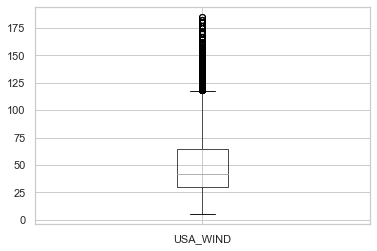

In [586]:
hurricanes_raw.boxplot(column='USA_WIND')  # view outliers for USA_WIND
hurricanes_raw.USA_WIND.mean(skipna=True)  # calculate average USA_WIND value to explain outliers

<p>Below is the dataframe I will use for my calculations and project which include the variables I manually chose and checked for sufficient data.</p>

In [587]:
# hurricanes = hurricanes_raw.filter(items=ordered_columns)

# Create a new dataframe with the chosen variables
hurricanes = hurricanes_raw.filter(['SID', 'SEASON', 'NUMBER', 'BASIN', 'SUBBASIN', 'NAME', 'ISO_TIME', 'NATURE',\
                                    'DIST2LAND', 'USA_STATUS', 'USA_WIND', 'USA_PRES', 'USA_SSHS', 'STORM_SPEED',\
                                    'STORM_DIR'])
hurricanes.head()
hurricanes.info()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,DIST2LAND,USA_STATUS,USA_WIND,USA_PRES,USA_SSHS,STORM_SPEED,STORM_DIR
0,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 03:00:00,NR,43,NaN,NaN,NaN,-1.0,9.0,266.0
1,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 06:00:00,NR,0,NaN,NaN,NaN,-1.0,9.0,267.0
2,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 09:00:00,NR,0,NaN,NaN,NaN,-1.0,9.0,267.0
3,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 12:00:00,NR,0,NaN,NaN,NaN,-1.0,9.0,267.0
4,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 15:00:00,NR,0,NaN,NaN,NaN,-1.0,9.0,268.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698308 entries, 0 to 698307
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   SID          698308 non-null  object 
 1   SEASON       698308 non-null  int64  
 2   NUMBER       698308 non-null  int64  
 3   BASIN        576041 non-null  object 
 4   SUBBASIN     604975 non-null  object 
 5   NAME         698308 non-null  object 
 6   ISO_TIME     698308 non-null  object 
 7   NATURE       698308 non-null  object 
 8   DIST2LAND    698308 non-null  int64  
 9   USA_STATUS   233946 non-null  object 
 10  USA_WIND     373157 non-null  float64
 11  USA_PRES     138491 non-null  float64
 12  USA_SSHS     692083 non-null  float64
 13  STORM_SPEED  698202 non-null  float64
 14  STORM_DIR    698202 non-null  float64
dtypes: float64(5), int64(3), object(7)
memory usage: 79.9+ MB


<p>Check again for null values in each column and view the shape of the dataframe.</p>

In [588]:
hurricanes.isnull().sum()  # find all null values for each column
hurricanes.shape  # view shape of dataframe (148 columns eliminated)

SID                 0
SEASON              0
NUMBER              0
BASIN          122267
SUBBASIN        93333
NAME                0
ISO_TIME            0
NATURE              0
DIST2LAND           0
USA_STATUS     464362
USA_WIND       325151
USA_PRES       559817
USA_SSHS         6225
STORM_SPEED       106
STORM_DIR         106
dtype: int64

(698308, 15)

<p>Search for all rows with null values and drop from the dataframe.  View shape of dataframe once removed.</p>

In [589]:
# Drop all rows with null values in the above columns
hurricanes.dropna(axis=0, how='any', inplace=True, subset=['BASIN', 'SUBBASIN', 'USA_STATUS', 'USA_WIND',\
                                                           'USA_PRES', 'USA_SSHS', 'STORM_SPEED', 'STORM_DIR'])
hurricanes.isnull().sum()  # check to see that there are no more null values
hurricanes.shape  # view shape of dataframe after dropping null values (604,410 rows eliminated)

SID            0
SEASON         0
NUMBER         0
BASIN          0
SUBBASIN       0
NAME           0
ISO_TIME       0
NATURE         0
DIST2LAND      0
USA_STATUS     0
USA_WIND       0
USA_PRES       0
USA_SSHS       0
STORM_SPEED    0
STORM_DIR      0
dtype: int64

(93898, 15)

<p>Lastly, check for any duplicate rows and remove from dataframe if necessary.</p>
<p>I did not remove unique column values, as some records cover one storm (name of storm would be the same for those rows).  The records track movement of storms with their respective wind speeds and pressure.  I expected that each row of data would be unique because of this.</p>

In [590]:
duplicates = hurricanes[hurricanes.duplicated()]  #  view any or all duplicate rows in dataframe
print(duplicates)

Empty DataFrame
Columns: [SID, SEASON, NUMBER, BASIN, SUBBASIN, NAME, ISO_TIME, NATURE, DIST2LAND, USA_STATUS, USA_WIND, USA_PRES, USA_SSHS, STORM_SPEED, STORM_DIR]
Index: []


<p>Once all data is cleaned, create a CSV file for submission.</p>

In [591]:
hurricanes.to_csv('hurricanes_final.csv',index=False)  # create CSV file with updated data set

# EDA Phase 2

In [608]:
# Load modules
import pandas as pd
import numpy as np

# Load for visuals
import matplotlib.pyplot as plt
import seaborn as sns

# Set up notebook to display multiple output in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [609]:
# Read file from Phase 1
df = pd.read_csv('hurricanes_final.csv')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93898 entries, 0 to 93897
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SID          93898 non-null  object 
 1   SEASON       93898 non-null  int64  
 2   NUMBER       93898 non-null  int64  
 3   BASIN        93898 non-null  object 
 4   SUBBASIN     93898 non-null  object 
 5   NAME         93898 non-null  object 
 6   ISO_TIME     93898 non-null  object 
 7   NATURE       93898 non-null  object 
 8   DIST2LAND    93898 non-null  int64  
 9   USA_STATUS   93898 non-null  object 
 10  USA_WIND     93898 non-null  float64
 11  USA_PRES     93898 non-null  float64
 12  USA_SSHS     93898 non-null  float64
 13  STORM_SPEED  93898 non-null  float64
 14  STORM_DIR    93898 non-null  float64
dtypes: float64(5), int64(3), object(7)
memory usage: 10.7+ MB


,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,DIST2LAND,USA_STATUS,USA_WIND,USA_PRES,USA_SSHS,STORM_SPEED,STORM_DIR
0,1954259N20253,1954,63,EP,MM,NOT_NAMED,1954-09-19 00:00:00,TS,626,TS,45.0,981.0,0.0,8.0,259.0
1,1957218N18234,1957,40,EP,MM,NOT_NAMED,1957-08-08 00:00:00,TS,1936,TS,60.0,994.0,0.0,14.0,296.0
2,1957218N18234,1957,40,EP,CP,NOT_NAMED,1957-08-10 00:00:00,TS,1140,TS,45.0,1004.0,0.0,19.0,317.0
3,1957218N18234,1957,40,EP,CP,NOT_NAMED,1957-08-13 00:00:00,TS,1447,TS,55.0,987.0,0.0,11.0,286.0
4,1958157N12262,1958,39,EP,MM,NOT_NAMED,1958-06-07 18:00:00,TS,493,TS,45.0,992.0,0.0,6.0,284.0


<h1 style='color:#008000'>Overall Data</h1>

<div style='background-color:#e6f2ff'>
    <h3>Plot Findings</h3>
    <ul>
        <li>There is a correlation between wind speeds and pressure in storms (the greater the wind speed, the lower the pressure).</li>
        <li>Higher wind speeds resulted in a higher storm classification (USA_SSHS).</li>
        <li>There is no distinction in storm intensity over time.  Storms of various wind speeds and pressures are present throughout data set.</li>
    </ul>
</div>

<Figure size 864x576 with 0 Axes>

<AxesSubplot:xlabel='USA_PRES', ylabel='USA_WIND'>

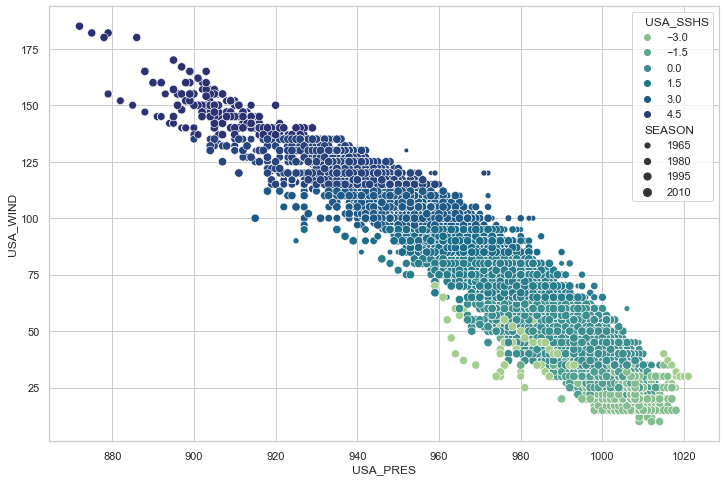

In [610]:
# Plot storm wind speeds and pressure of all data
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='USA_PRES', y='USA_WIND', hue='USA_SSHS', size='SEASON', palette='crest')

In [611]:
# View the number of storms per year for entire data set
storms = df.sort_values('USA_SSHS').drop_duplicates(subset=['SID'], keep='last')  # filter data set by storm SSHS
storms.SEASON.value_counts()
storms.info()

2018    90
2015    90
2019    87
2013    84
2008    83
2009    83
2002    82
2006    80
2004    79
2016    78
2003    78
2017    76
2014    75
2005    75
2007    72
2012    69
2011    68
2010    62
2001    57
1992    25
2020    21
1990    21
2000    17
1997    17
1989    17
1994    17
1993    15
1991    14
1988    14
1998    13
1971    13
1996    11
1995    10
1999     9
1972     9
1973     8
1970     7
2021     6
1976     6
1974     6
1977     3
1969     3
1959     3
1975     2
1957     1
1979     1
1968     1
1967     1
1960     1
1958     1
1954     1
Name: SEASON, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1762 entries, 71464 to 75497
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SID          1762 non-null   object 
 1   SEASON       1762 non-null   int64  
 2   NUMBER       1762 non-null   int64  
 3   BASIN        1762 non-null   object 
 4   SUBBASIN     1762 non-null   object 
 5   NAME         1762 non-null   object 
 6   ISO_TIME     1762 non-null   object 
 7   NATURE       1762 non-null   object 
 8   DIST2LAND    1762 non-null   int64  
 9   USA_STATUS   1762 non-null   object 
 10  USA_WIND     1762 non-null   float64
 11  USA_PRES     1762 non-null   float64
 12  USA_SSHS     1762 non-null   float64
 13  STORM_SPEED  1762 non-null   float64
 14  STORM_DIR    1762 non-null   float64
dtypes: float64(5), int64(3), object(7)
memory usage: 220.2+ KB


In [612]:
# View the regions where the most storms occur
storms.BASIN.value_counts()

# NA - North Atlantic
# SA - South Atlantic
# EP - Eastern North Pacific
# WP - Western North Pacific
# SP - Southern Pacific
# NI - North Indian
# SI - South Indian

EP    667
WP    554
SI    281
SP    152
NI    105
SA      3
Name: BASIN, dtype: int64

In [614]:
# View the number of storms per Saffir-Simpson Hurricane Scale classification based on wind speeds
storms.USA_SSHS.value_counts().sort_index()

# -5 = Unknown
# -4 = Post-tropical
# -3 = Miscellaneous disturbances
# -2 = Subtropical
# -1 = Tropical depression (W<34)
# 0 = Tropical storm [34<W<64]
# 1 = Category 1 [64<=W<83]
# 2 = Category 2 [83<=W<96]
# 3 = Category 3 [96<=W<113]
# 4 = Category 4 [113<=W<137]
# 5 = Category 5 [W >= 137]

-3.0      7
-2.0      2
-1.0    154
 0.0    712
 1.0    250
 2.0    133
 3.0    131
 4.0    271
 5.0    102
Name: USA_SSHS, dtype: int64

<div style='background-color:#e6f2ff'>
    <h3>Plot Findings</h3>
    <ul>
        <li>Based on the count of storms by SSHS classification, most storms fall into the tropical storm range (median).</li>
        <li>At a glance, there are more storms that were ranked above a Category 1 storm than depressions/subtropical storms.</li>
        <li>The <i>Count of Tropical Storms by Season</i> indicate that the last few years have produced the most storms.</li>
    </ul>
</div>

(array([  7.,   2., 154., 712.,   0., 250., 133., 131., 271., 102.]),
 array([-3. , -2.2, -1.4, -0.6,  0.2,  1. ,  1.8,  2.6,  3.4,  4.2,  5. ]),
 <BarContainer object of 10 artists>)

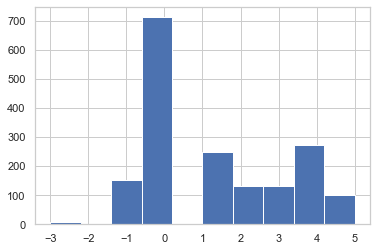

In [615]:
# Historgram view of storms per SSHS classification
plt.hist(storms.USA_SSHS)

<AxesSubplot:ylabel='SEASON'>

Text(0.5, 1.0, 'Count of Tropical Storms by Season')

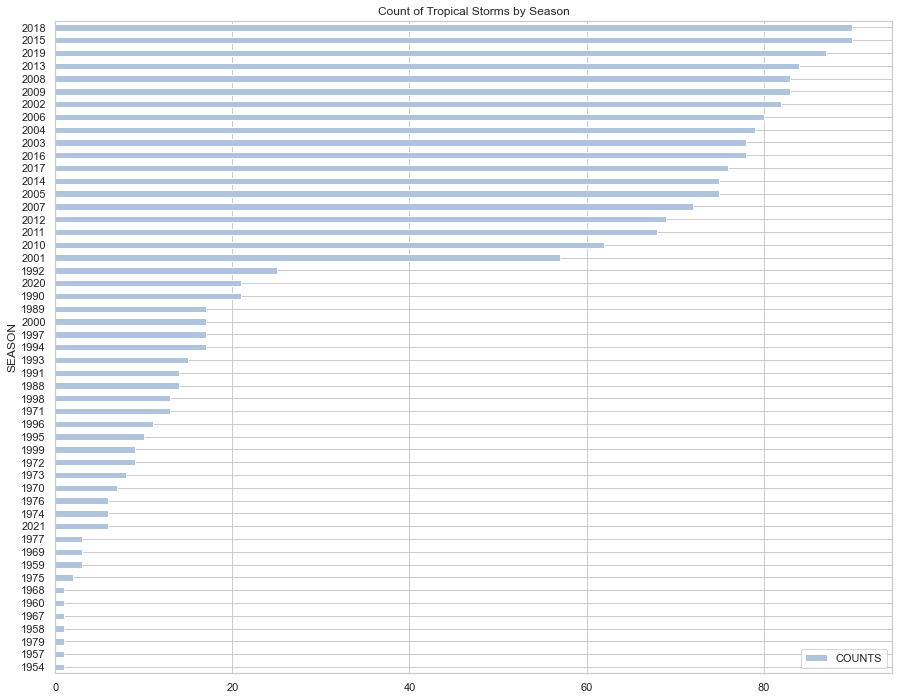

In [616]:
# Based on our data we can view the number of storms by year
fig, ax = plt.subplots(figsize=(15, 12))
counts = storms['SEASON'].value_counts().reset_index()
counts.columns = ['SEASON', 'COUNTS']

# Plot horizontal bar graph
counts.sort_values(by='COUNTS').plot.barh(x='SEASON', y='COUNTS', ax=ax, color='lightsteelblue')
ax.set_title('Count of Tropical Storms by Season')

plt.show()

<h1 style='color:#008000'>Strongest Storms</h1>

In [617]:
# In order to explore the occurences of storms by month, create a new column for the month using the ISO_TIME
df['MONTH'] = df['ISO_TIME'].str[5:7]

In [618]:
# Create a new dataframe for storms with an SSHS category of 5 or higher and group by storm (using its max value)
strongest_storms = df[df.USA_SSHS >= 5].sort_values('USA_WIND').drop_duplicates(subset=['SID'], keep='last')
strongest_storms.info()
strongest_storms.head()
# test = df.loc[df['SID'] == '2015293N13266']  # data check by storm
# test.head(30)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 63020 to 73719
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SID          102 non-null    object 
 1   SEASON       102 non-null    int64  
 2   NUMBER       102 non-null    int64  
 3   BASIN        102 non-null    object 
 4   SUBBASIN     102 non-null    object 
 5   NAME         102 non-null    object 
 6   ISO_TIME     102 non-null    object 
 7   NATURE       102 non-null    object 
 8   DIST2LAND    102 non-null    int64  
 9   USA_STATUS   102 non-null    object 
 10  USA_WIND     102 non-null    float64
 11  USA_PRES     102 non-null    float64
 12  USA_SSHS     102 non-null    float64
 13  STORM_SPEED  102 non-null    float64
 14  STORM_DIR    102 non-null    float64
 15  MONTH        102 non-null    object 
dtypes: float64(5), int64(3), object(8)
memory usage: 13.5+ KB


,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,DIST2LAND,USA_STATUS,USA_WIND,USA_PRES,USA_SSHS,STORM_SPEED,STORM_DIR,MONTH
63020,2013289N14149,2013,80,WP,MM,FRANCISCO,2013-10-19 12:00:00,TS,1562,ST,140.0,918.0,5.0,8.0,298.0,10
58359,2012263N15141,2012,62,WP,MM,JELAWAT,2012-09-25 06:00:00,TS,434,ST,140.0,918.0,5.0,7.0,330.0,09
62792,2013281N12098,2013,75,NI,BB,PHAILIN,2013-10-11 18:00:00,TS,331,ST,140.0,918.0,5.0,6.0,297.0,10
47718,2009287N10154,2009,81,WP,MM,LUPIT,2009-10-19 00:00:00,TS,1156,ST,140.0,918.0,5.0,7.0,317.0,10
47044,2009255N13155,2009,68,WP,MM,CHOI-WAN,2009-09-16 18:00:00,TS,1637,ST,140.0,918.0,5.0,7.0,322.0,09


In [619]:
# Create two dataframes to 1) show the total number of storms with high winds and 2) the total number of
# Category 5 storms with high winds
df_by_storm = df.sort_values('USA_WIND').drop_duplicates(subset=['SID'], keep='last')
df_counts = df_by_storm.MONTH.value_counts().sort_index()
# df_counts
ss_counts = strongest_storms.MONTH.value_counts().sort_index()
# ss_counts

<div style='background-color:#e6f2ff'>
    <h3>Plot Findings</h3>
    <ul>
        <li>Although there is a large amount of storms per year, the number of Category 5 storms in comparison is still very small.</li>
        <li>December seems to have the most storm activity, but October carries the highest number of Category 5 storms.</li>
        <li>Storm season runs between September through December.</li>
    </ul>
</div>

<AxesSubplot:xlabel='MONTH', ylabel='MONTH'>

<AxesSubplot:xlabel='MONTH', ylabel='MONTH'>

[(-1.0, 12.0),
 Text(0, 0.5, ''),
 Text(0.5, 0, 'Category 5 Storm comparison to Total')]

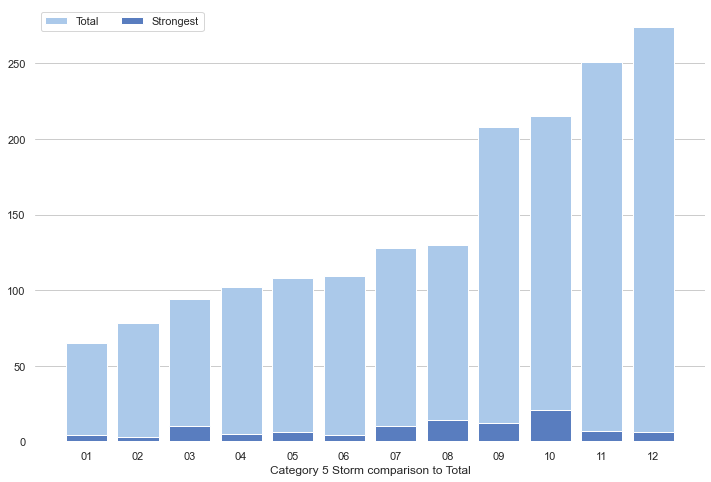

In [620]:
# Plot a chart to compare the number of Category 5 storms against the total number of storms overall
f, ax = plt.subplots(figsize=(12, 8))

sns.set_color_codes('pastel')
sns.barplot(data=df_counts, x=df_counts.keys(), y=df_counts, label='Total', color='b')

sns.set_color_codes('muted')
sns.barplot(data=strongest_storms, x=ss_counts.keys(), y=ss_counts, label='Strongest', color='b')

ax.legend(ncol=2, loc='upper left', frameon=True)
ax.set(xlim=(-1, 12), ylabel='', xlabel='Category 5 Storm comparison to Total')
sns.despine(left=True, bottom=True)

<h1 style='color:#008000'>Average and Maximum Wind Speeds</h1>

In [621]:
# Set up a dataframe for calculating average and maximum wind speeds
stats = df.filter(['SID', 'SEASON', 'BASIN', 'NAME', 'USA_STATUS', 'USA_WIND', 'USA_PRES'])
stats.info()
stats.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93898 entries, 0 to 93897
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SID         93898 non-null  object 
 1   SEASON      93898 non-null  int64  
 2   BASIN       93898 non-null  object 
 3   NAME        93898 non-null  object 
 4   USA_STATUS  93898 non-null  object 
 5   USA_WIND    93898 non-null  float64
 6   USA_PRES    93898 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 5.0+ MB


,SID,SEASON,BASIN,NAME,USA_STATUS,USA_WIND,USA_PRES
0,1954259N20253,1954,EP,NOT_NAMED,TS,45.0,981.0
1,1957218N18234,1957,EP,NOT_NAMED,TS,60.0,994.0
2,1957218N18234,1957,EP,NOT_NAMED,TS,45.0,1004.0
3,1957218N18234,1957,EP,NOT_NAMED,TS,55.0,987.0
4,1958157N12262,1958,EP,NOT_NAMED,TS,45.0,992.0


In [628]:
# Calculate the average wind speeds for each storm per season
averages = stats.groupby(['SEASON', 'SID', 'NAME']).mean().reset_index()
averages.head()

,SEASON,SID,NAME,USA_WIND,USA_PRES
0,1954,1954259N20253,NOT_NAMED,45.000000,981.0
1,1957,1957218N18234,NOT_NAMED,53.333333,995.0
2,1958,1958157N12262,NOT_NAMED,45.000000,992.0
3,1959,1959214N16219,DOT,130.000000,952.0
4,1959,1959265N16241,NOT_NAMED,70.000000,967.0


<Figure size 864x576 with 0 Axes>

<AxesSubplot:xlabel='SEASON', ylabel='USA_WIND'>

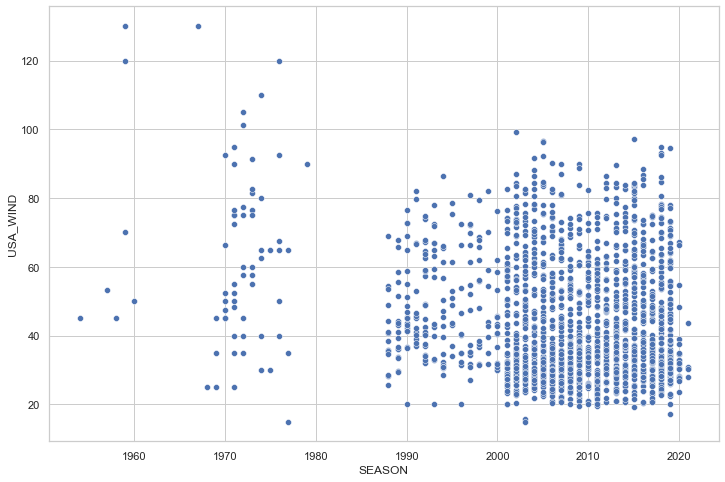

In [631]:
# Plot the average wind speeds for each storm per season
plt.figure(figsize=(12,8))
sns.scatterplot(data=averages, x='SEASON', y='USA_WIND')

In [632]:
# Calculate the maximum wind speeds for each storm per season
max_wind = stats.sort_values('USA_WIND').drop_duplicates(subset=['SID'], keep='last')
max_wind_season = stats.sort_values('USA_WIND').drop_duplicates(subset=['SEASON'], keep='last')

<div style='background-color:#e6f2ff'>
    <h3>Plot Findings</h3>
    <ul>
        <li>When viewing each storm's maximum wind speed per season, we can see that the max speeds have not increased much over time.  There are many storms that have lower wind speeds to even out the trend.</li>
        <li>However, when taking just the top storms of each year, the second plot indicates that max wind speeds have increased over time.</li>
    </ul>
</div>

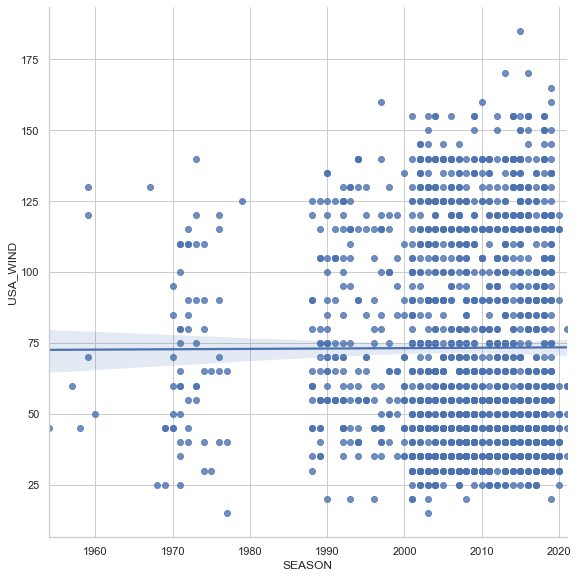

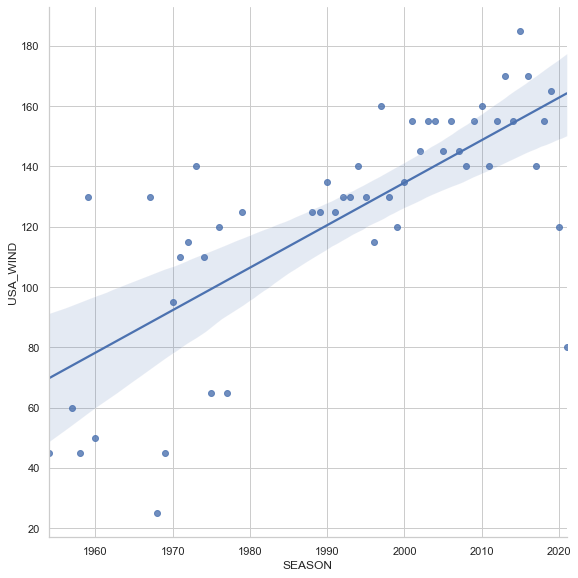

In [633]:
# Plot the maximum wind speeds for each storms per season
sns.lmplot(data=max_wind, x='SEASON', y='USA_WIND', height=8)
sns.lmplot(data=max_wind_season, x='SEASON', y='USA_WIND', height=8)

<h1 style='color:#008000'>Results</h1>
<p>Overall, the data output is not unusual.  The data shows that greater wind speed storms have lower pressure (expected).  There is not an overall increase in storm intensities over time, although the highest wind speed noted per year <i>is</i> increasing.  From the last plot above, you can clearly see the increasing top speeds per season.  Part of this could be due to the availability of better tracking instruments.  Before the early 90s, there was less data present in this data set so it is more difficult to conclude whether or not there were stronger storms before that era.</p>
<p>In addition, a very small percentage of storms (thankfully) per year are high intensity storms, which is why we probably remember the few catastrophic ones.  Also to note, are the years with the highest <i>number</i> of storms.  They fall within the last decade and are contrary to my hypothesis that the number of storms are not increasing per year.</p>